 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [75]:
# Initial imports
import pandas as pd
import numpy as np
# import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [76]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_data = pd.read_csv(whale_path)

# whale_data = whale_data.set_index('Date')

whale_data.set_index(pd.to_datetime(whale_data['Date'], infer_datetime_format=True), inplace=True)
whale_data = whale_data.drop(columns=['Date'])

# whale_data.head()
# whale_data['Date'].dtype
# whale_return_march = whale_data.loc['2015-03-03':'2015-03-30']
# whale_return_march

In [77]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [78]:
# Drop nulls

whale_data.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [79]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_data = pd.read_csv(algo_path)


algo_data.set_index(pd.to_datetime(algo_data['Date'], infer_datetime_format=True), inplace=True)
algo_data = algo_data.drop(columns=['Date'])


# algo_data = algo_data.set_index('Date')
# algo_data.head()
# algo_return_march = algo_data.loc['2015-03-03':'2015-03-30']
# algo_return_march

In [80]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [81]:
# Drop nulls
algo_data.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [82]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv', parse_dates=True, infer_date_time_format=True)
sp500_data = pd.read_csv(sp500_path)

sp500_data.set_index(pd.to_datetime(sp500_data['Date'], infer_datetime_format=True), inplace=True)
sp500_data = sp500_data.drop(columns=['Date'])


# sp500_data = sp500_data.set_index('Date')
# sp500_return_march = sp500_data.loc['2015-03-03':'2015-03-30']
# sp500_return_march
# # sp500_data.head(10)

In [83]:
# Check Data Types
sp500_data['Close'].dtype


dtype('O')

In [84]:
# Fix Data Types

sp500_data['Close'] = sp500_data['Close'].str.replace('$',' ')

sp500_data['Close'] = sp500_data['Close'].astype('float')


C:\Users\Avi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
# Calculate Daily Return

sp500_daily_returns = sp500_data.pct_change()
sp500_daily_returns



,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [86]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()


In [87]:
# Rename `Close` Column to be specific to this portfolio.
col_name = ['SP500 Daily Returns']

sp500_daily_returns.columns = col_name


## Combine Whale, Algorithmic, and S&P 500 Returns

In [88]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_data, algo_data, sp500_daily_returns], axis='columns', join='inner')

all_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Daily Returns'}, xlabel='Date'>

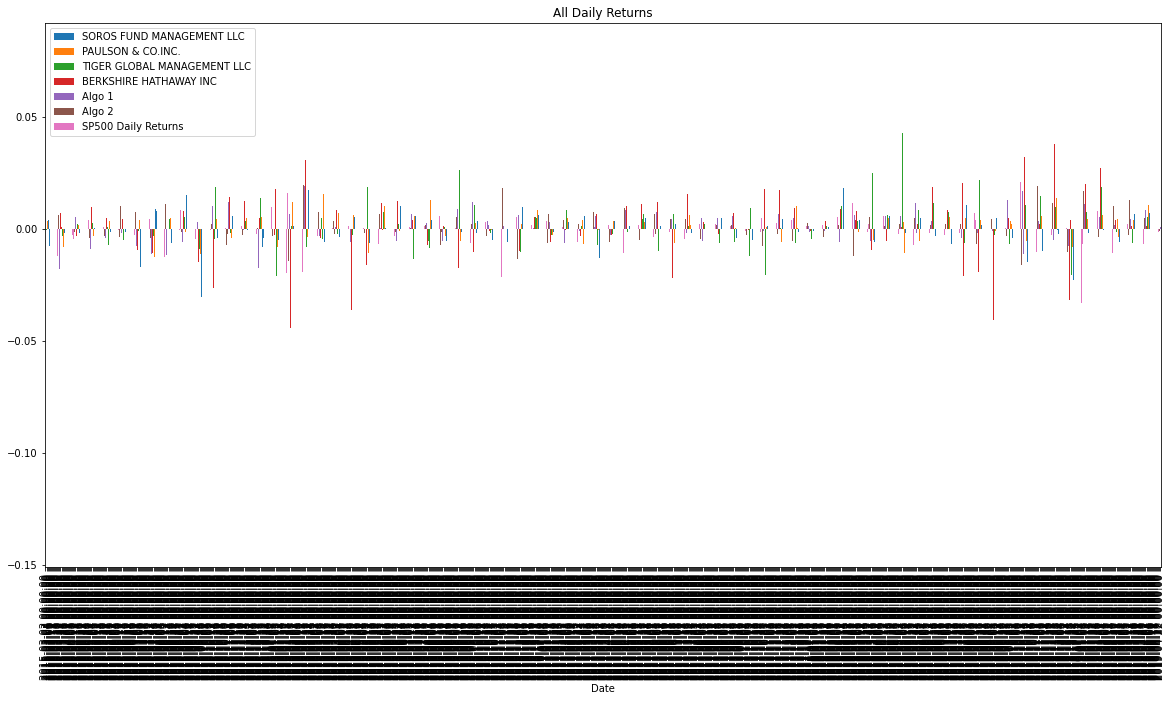

In [89]:
# Plot daily returns of all portfolios
# whale_data.plot(title='Whale Daily Returns',  figsize=(20,10))
# algo_data.plot(title='Algo Daily Returns', figsize=(20,10))
# sp500_daily_returns.plot(title='S&P 500 Daily Returns', figsize=(20,10))

all_returns.plot(kind='bar', title='All Daily Returns', figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

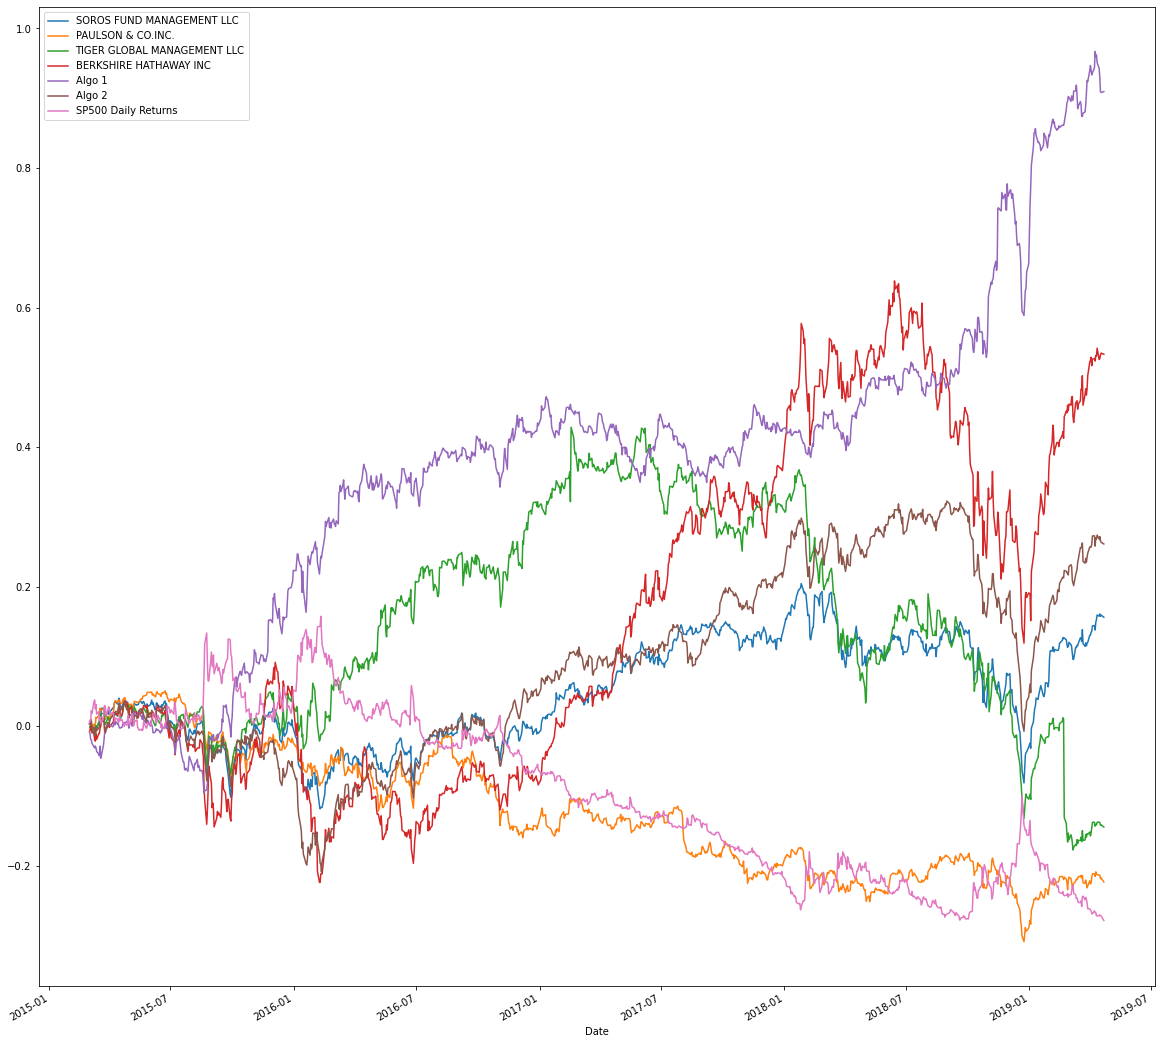

In [130]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [131]:
# Box plot to visually show risk

# whale_data.boxplot(fontsize='large', figsize=(20,15))

# algo_data.boxplot(fontsize='large', figsize=(20,15))

# sp500_daily_returns.boxplot(fontsize='large', figsize=(20,15))


<AxesSubplot:>

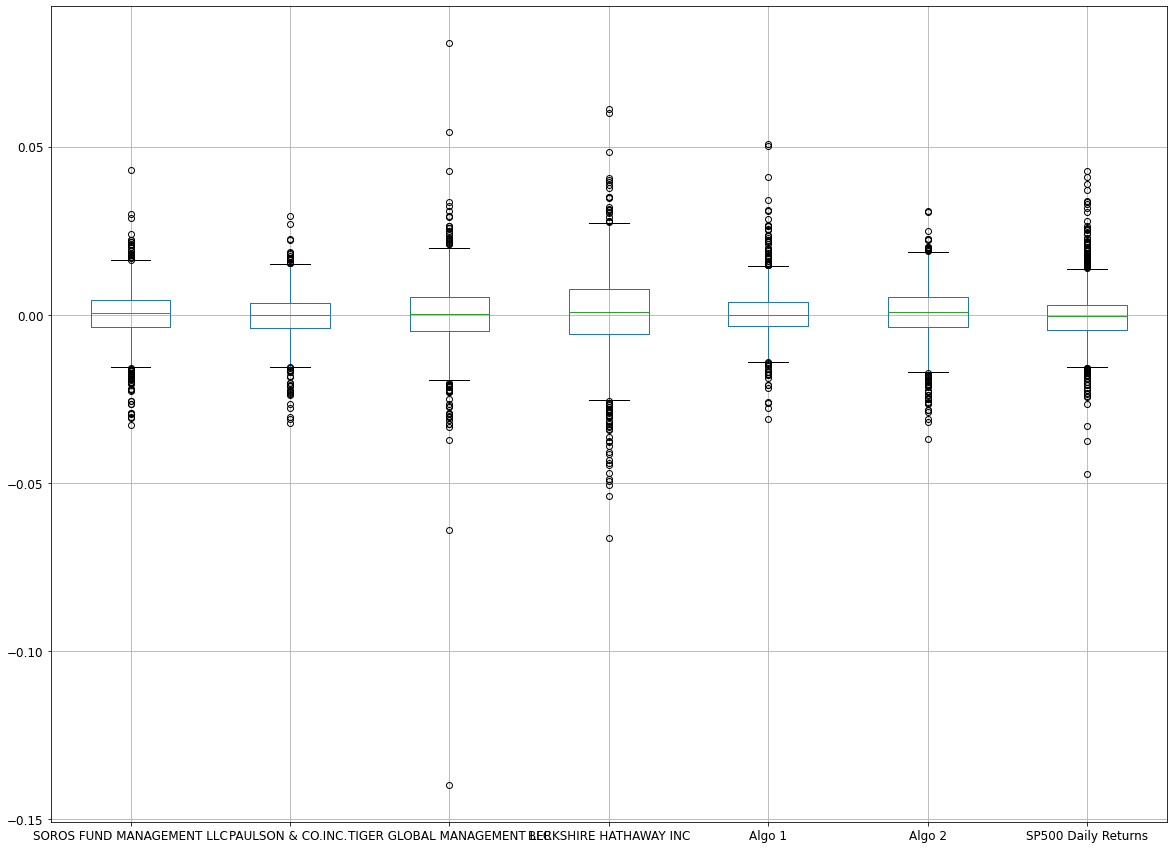

In [132]:
all_returns.boxplot(fontsize='large', figsize=(20,15))

### Calculate Standard Deviations

In [133]:
# Calculate the daily standard deviations of all portfolios

# whale_data_std  = whale_data.std()
# algo_data_std = algo_data.std()
# sp500_daily_returns_std = sp500_daily_returns.std()

all_returns_std = all_returns.std()

all_returns_std



SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007624
Algo 2                         0.008338
SP500 Daily Returns            0.008584
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [134]:
# Calculate  the daily standard deviation of S&P 500

sp500_annual_std = sp500_daily_returns.std() * np.sqrt(252)

sp500_annual_std.head()
# Determine which portfolios are riskier than the S&P 500


SP500 Daily Returns    0.129133
dtype: float64

### Calculate the Annualized Standard Deviation

In [135]:
# Calculate the annualized standard deviation (252 trading days)
all_annual_returns_std = all_returns.std() * np.sqrt(252)

all_annual_returns_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121026
Algo 2                         0.132357
SP500 Daily Returns            0.136268
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

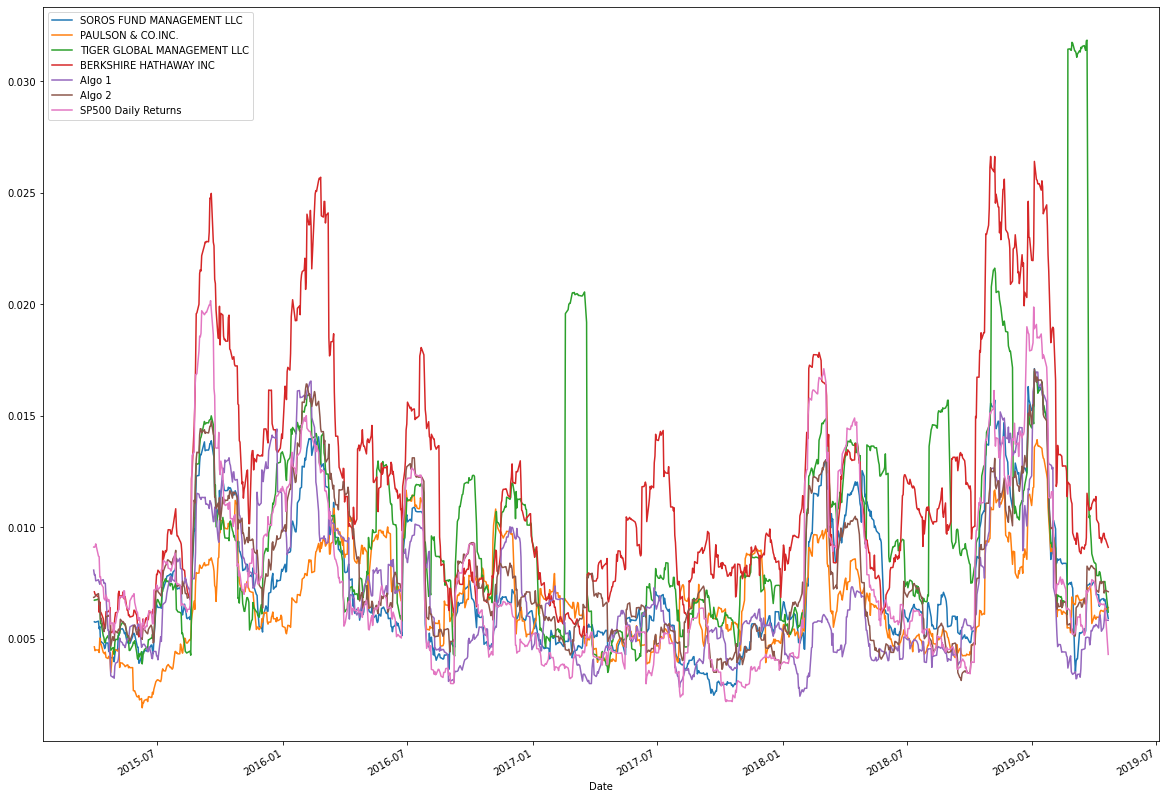

In [136]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation


all_returns.rolling(window=21).std().plot(figsize=(20,15))

### Calculate and plot the correlation

<AxesSubplot:>

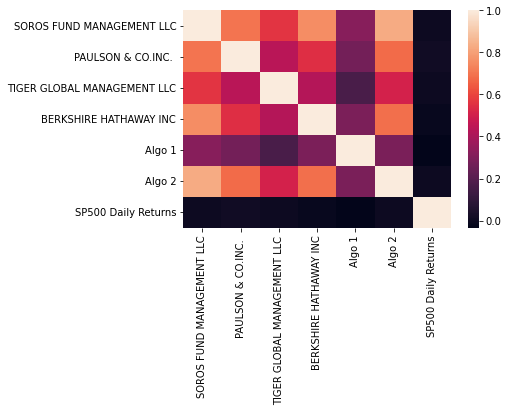

In [181]:
# Calculate the correlation
# Display de correlation matrix

fin_corr = all_returns.corr()

sns.heatmap(fin_corr)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

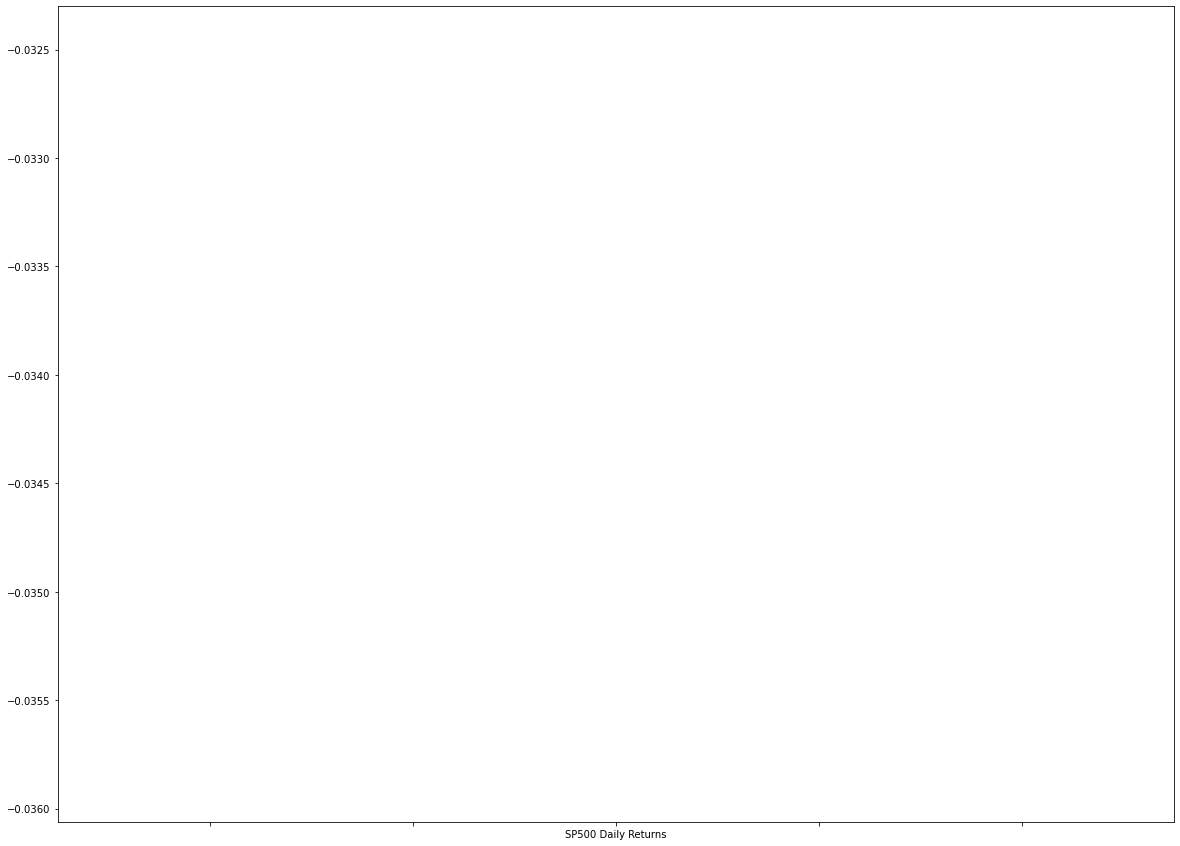

In [182]:
# Calculate covariance of a single portfolio

algo_1_cova =all_returns['Algo 1'].cov(all_returns['SP500 Daily Returns']) 
# algo_1_cova
# Calculate variance of S&P 500

sp500_vari = sp500_daily_returns.var() 
# sp500_vari

# Computing beta

algo_beta = algo_1_cova / sp500_vari

algo_beta

# Plot beta trend
algo_beta.plot(figsize=(20,15))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [183]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [184]:
# Annualized Sharpe Ratios

all_returns_sharp = (all_returns.mean() * 252) / (all_annual_returns_std)

all_returns_sharp

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.351769
Algo 2                         0.489915
SP500 Daily Returns           -0.510171
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for All Returns'}>

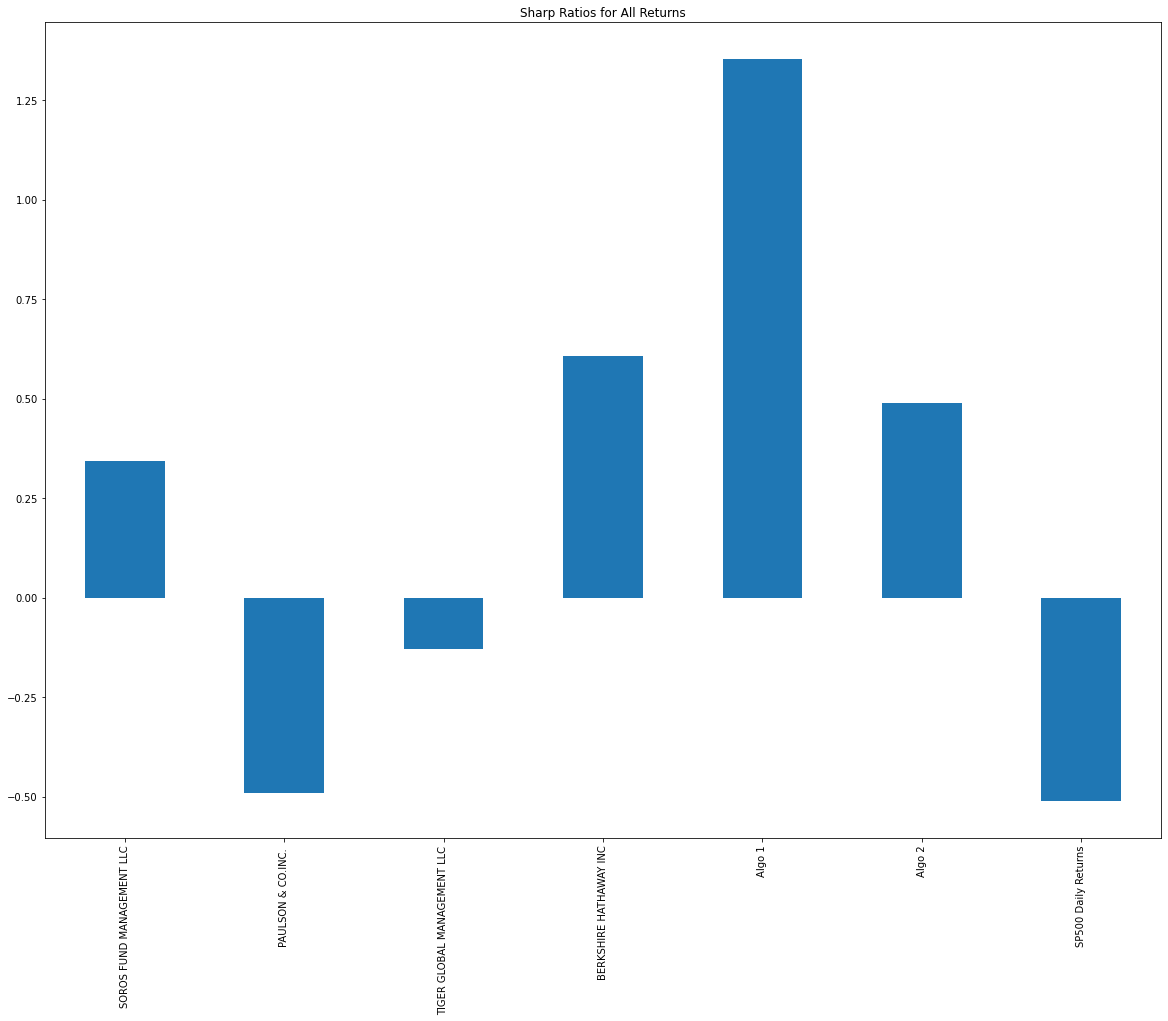

In [185]:
# Visualize the sharpe ratios as a bar plot
all_returns_sharp.plot.bar(title='Sharp Ratios for All Returns', figsize=(20,15))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Neither of the algorithmic strategies outperform the S&P 500 nor the whale portfolios. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [218]:
# Reading data from 1st stock
amd_csvpath = Path('Resources/amd_close.csv')
amd_data = pd.read_csv(amd_csvpath)

amd_data.head()

amd_data['Date'] = sp500_data['Date'].replace(' 16:00:00',' ')

# amd_data.set_index(pd.to_datetime(amd_data['Date'], infer_datetime_format=True), inplace=True)
# amd_data = amd_data.drop(columns=['Date'])



KeyError: 'Date'

In [187]:
# Reading data from 2nd stock
nvda_csvpath = Path('Resources/nvda_close.csv')
nvda_data = pd.read_csv(nvda_csvpath)

# nvda_data.set_index(pd.to_datetime(nvda_data['Date'], infer_datetime_format=True), inplace=True)
# nvda_data = nvda_data.drop(columns=['Date'])


In [188]:
# Reading data from 3rd stock
tsm_csvpath = Path('Resources/tsm_close.csv')
tsm_data = pd.read_csv(tsm_csvpath)

# tsm_data.set_index(pd.to_datetime(tsm_data['Date'], infer_datetime_format=True), inplace=True)
# tsm_data = tsm_data.drop(columns=['Date'])


In [211]:
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol

add_col = ['AMD', 'NVDA', 'TSM']

added_stocks = pd.concat([amd_data, nvda_data, tsm_data], axis='columns', join='inner')
added_stocks.columns = add_col


In [190]:
# Calculate daily returns
custom_returns = added_stocks.pct_change()

In [191]:
# Drop NAs

custom_returns.dropna()

,AMD,NVDA,TSM
Date,,,
2014-01-03 16:00:00,0.012658,-0.012594,-0.011662
2014-01-06 16:00:00,0.032500,0.012755,-0.002950
2014-01-07 16:00:00,0.012107,0.017632,0.000592
2014-01-08 16:00:00,0.000000,0.012376,0.010645
2014-01-09 16:00:00,-0.021531,-0.036675,-0.019310
...,...,...,...
2020-12-24 13:00:00,0.002840,-0.001153,0.021299
2020-12-28 16:00:00,-0.002287,-0.007234,0.001699
2020-12-29 16:00:00,-0.010699,0.003333,-0.005558


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [210]:
# Set weights
weights = [1/3, 1/3, 1/3]
weight_col = ["Weighted Returns"]
# Calculate portfolio return

my_port_returns = custom_returns.dot(weights)

my_port_returns.columns = weight_col
# Display sample data

my_port_returns

Date
2014-01-02 16:00:00         NaN
2014-01-03 16:00:00   -0.003866
2014-01-06 16:00:00    0.014102
2014-01-07 16:00:00    0.010110
2014-01-08 16:00:00    0.007674
                         ...   
2020-12-24 13:00:00    0.007662
2020-12-28 16:00:00   -0.002608
2020-12-29 16:00:00   -0.004308
2020-12-30 16:00:00    0.021918
2020-12-31 16:00:00   -0.003974
Length: 1763, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [207]:
# Join your returns DataFrame to the original returns DataFrame
main_port = pd.concat([all_returns, my_port_returns], axis='columns', join='inner')
main_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,0
Date,,,,,,,,


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [41]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios


In [45]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!